- Import Libreries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import plotly as py
from datetime import datetime
import calendar
from scipy import stats

from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor # calling model
from sklearn.ensemble import GradientBoostingRegressor

# Regressors considered:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

print('Library Loaded')

Library Loaded


- Analyze the Dataset

In [ ]:
train_label=pd.read_csv('C:\\Users\\Srimanta\\PC\\Downloads\\Mid_term_project\\train_label.csv',header=None)
test_label=pd.read_csv('C:\\Users\\Srimanta\\PC\\Downloads\\Mid_term_project\\test_label.csv',header=None)

In [ ]:
train=pd.read_csv('C:\\Users\\Srimanta\\PC\\Downloads\\Mid_term_project\\train.csv')
train.head()

datetime  season  holiday  workingday              weather   temp   atemp  humidity  windspeed
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14  25.760        77    16.9979
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70  33.335        79    19.0012
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   6.060        50    22.0028
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94  16.665        29     8.9981
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34  33.335        51    19.0012

In [ ]:
test=pd.read_csv('C:\\Users\\Srimanta\\PC\\Downloads\\Mid_term_project\\test.csv')
test.head()

datetime  season  holiday  workingday                  weather   temp   atemp  humidity  windspeed
0   5/10/2012 11:00  Summer        0           1       Clear + Few clouds  21.32  25.000        48    35.0008
1     6/9/2012 7:00  Summer        0           0       Clear + Few clouds  23.78  27.275        64     7.0015
2    3/6/2011 20:00  Spring        0           0   Light Snow, Light Rain  11.48  12.120       100    27.9993
3  10/13/2011 11:00  Winter        0           1           Mist + Cloudy   25.42  28.790        83     0.0000
4    6/2/2012 12:00  Summer        0           0       Clear + Few clouds  25.42  31.060        43    23.9994

In [ ]:
print(train.shape)
print(test.shape)
print(train_label.shape)
print(test_label.shape)

(8708, 9)
(2178, 9)
(8708, 1)
(2178, 1)


In [ ]:
train['Total_Booking'] = train_label[0]
test['Total_Booking'] = test_label[0]

In [ ]:
train.head()

datetime  season  holiday  workingday              weather   temp   atemp  humidity  windspeed  Total_Booking
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14  25.760        77    16.9979            504
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70  33.335        79    19.0012              5
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   6.060        50    22.0028            139
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94  16.665        29     8.9981            209
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34  33.335        51    19.0012            184

In [ ]:
test.head()

datetime  season  holiday  workingday                  weather   temp   atemp  humidity  windspeed  Total_Booking
0   5/10/2012 11:00  Summer        0           1       Clear + Few clouds  21.32  25.000        48    35.0008            256
1     6/9/2012 7:00  Summer        0           0       Clear + Few clouds  23.78  27.275        64     7.0015             87
2    3/6/2011 20:00  Spring        0           0   Light Snow, Light Rain  11.48  12.120       100    27.9993             11
3  10/13/2011 11:00  Winter        0           1           Mist + Cloudy   25.42  28.790        83     0.0000             84
4    6/2/2012 12:00  Summer        0           0       Clear + Few clouds  25.42  31.060        43    23.9994            668

- Feature Engineering

In [ ]:
train['date']= train.datetime.apply(lambda x : x.split()[0])
train['hour']= train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"]= train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train["month"]= train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [ ]:
test['date']= test.datetime.apply(lambda x : x.split()[0])
test['hour']= test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"]= test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
test["month"]= test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [ ]:
train.head()

datetime  season  holiday  workingday              weather   temp   atemp  humidity  windspeed  Total_Booking        date hour    weekday      month
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14  25.760        77    16.9979            504    5/2/2012   19  Wednesday        May
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70  33.335        79    19.0012              5    9/5/2012    4  Wednesday  September
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   6.060        50    22.0028            139   1/13/2011    9   Thursday    January
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94  16.665        29     8.9981            209  11/18/2011   16     Friday   November
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34  33.335        51    19.0012            184   9/13/2011   13    Tuesday  September

In [ ]:
train['season'] = train.season.astype('category')
train['holiday'] = train.holiday.astype('category')
train['workingday'] = train.workingday.astype('category')
train['weather'] = train.weather.astype('category')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   datetime       8708 non-null   object  
 1   season         8708 non-null   category
 2   holiday        8708 non-null   category
 3   workingday     8708 non-null   category
 4   weather        8708 non-null   category
 5   temp           8708 non-null   float64 
 6   atemp          8708 non-null   float64 
 7   humidity       8708 non-null   int64   
 8   windspeed      8708 non-null   float64 
 9   Total_Booking  8708 non-null   int64   
 10  date           8708 non-null   object  
 11  hour           8708 non-null   object  
 12  weekday        8708 non-null   object  
 13  month          8708 non-null   object  
dtypes: category(4), float64(3), int64(2), object(5)
memory usage: 715.0+ KB


In [ ]:
train.drop(['datetime'], axis = 1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         8708 non-null   category
 1   holiday        8708 non-null   category
 2   workingday     8708 non-null   category
 3   weather        8708 non-null   category
 4   temp           8708 non-null   float64 
 5   atemp          8708 non-null   float64 
 6   humidity       8708 non-null   int64   
 7   windspeed      8708 non-null   float64 
 8   Total_Booking  8708 non-null   int64   
 9   date           8708 non-null   object  
 10  hour           8708 non-null   object  
 11  weekday        8708 non-null   object  
 12  month          8708 non-null   object  
dtypes: category(4), float64(3), int64(2), object(4)
memory usage: 647.0+ KB


- Outlier Analysis

In [ ]:
rev_stat=train.Total_Booking.describe()
print(rev_stat)
# calculating interquartile range
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print()
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Total_Booking, dtype: float64

The upper and lower bounds for suspected outliers are -321.5 and 650.5


In [ ]:
outliers=train[train.Total_Booking>upper].index.tolist()
train[train.Total_Booking>upper]

season holiday workingday                  weather   temp   atemp  humidity  windspeed  Total_Booking        date hour    weekday      month
5       Fall       0          1       Clear + Few clouds  33.62  12.120        36    22.0028            791   8/17/2012   17     Friday     August
27    Summer       0          1       Clear + Few clouds  22.96  26.515        73    15.0013            813    5/2/2012   18  Wednesday        May
30      Fall       0          1       Clear + Few clouds  31.98  35.605        49    12.9980            872   7/10/2012   17    Tuesday       July
52    Summer       0          1       Clear + Few clouds  24.60  31.060        43    12.9980            790    6/5/2012   18    Tuesday       June
70    Summer       0          1       Clear + Few clouds  26.24  31.060        38    15.0013            669   5/18/2012   18     Friday        May
82    Spring       0          1           Mist + Cloudy   24.60  31.060        43    12.9980            712   3/12/2012   18     Monday      March
105     Fall       0          1           Mist + Cloudy   27.06  30.305        83    36.9974            672   9/18/2012    8    Tuesday  September
112   Winter       0          0       Clear + Few clouds  22.14  25.760        42    15.0013            653  11/11/2012   16     Sunday   November
125   Winter       0          1       Clear + Few clouds  15.58  19.695        94     0.0000            662  12/18/2012    8    Tuesday   December
133     Fall       0          0           Mist + Cloudy   27.06  31.060        36    16.9979            729   9/15/2012   17   Saturday  September
156     Fall       0          0           Mist + Cloudy   27.06  31.060        36    15.0013            783   9/15/2012   16   Saturday  September
157   Summer       0          0       Clear + Few clouds  29.52  32.575        30     7.0015            672   5/19/2012   15   Saturday        May
159   Spring       0          0       Clear + Few clouds  24.60  30.305        60     7.0015            686   3/17/2012   13   Saturday      March
239     Fall       0          1       Clear + Few clouds  31.16  34.090        40     7.0015            677   8/16/2012   19   Thursday     August
257     Fall       0          0       Clear + Few clouds  27.06  31.060        47     0.0000            757    9/9/2012   12     Sunday  September
325     Fall       0          1       Clear + Few clouds  22.96  26.515        64     7.0015            770   9/12/2012    8  Wednesday  September
343   Spring       0          1       Clear + Few clouds  28.70  31.820        32     0.0000            749   3/14/2012   18  Wednesday      March
510   Winter       0          1       Clear + Few clouds  21.32  25.000        39    12.9980            943  10/16/2012   17    Tuesday    October
565   Summer       0          0       Clear + Few clouds  26.24  31.060        38    16.9979            702    6/2/2012   15   Saturday       June
566     Fall       0          1       Clear + Few clouds  27.06  31.060        44    16.9979            977   9/12/2012   18  Wednesday  September
605     Fall       0          1       Clear + Few clouds  27.88  12.120        65     8.9981            668   8/17/2012    8     Friday     August
625     Fall       0          1       Clear + Few clouds  31.16  35.605        58    16.9979            657   7/19/2012    8   Thursday       July
727     Fall       0          1           Mist + Cloudy   28.70  32.575        65    19.0012            682   8/15/2012    8  Wednesday     August
768   Summer       0          1           Mist + Cloudy   26.24  30.305        69    19.0012            717    5/8/2012   17    Tuesday        May
891   Summer       0          1       Clear + Few clouds  29.52  32.575        32    30.0026            744   6/13/2012   18  Wednesday       June
956     Fall       0          1       Clear + Few clouds  36.90  40.150        33    12.9980            772   7/17/2012   18    Tuesday       July
991   Winter       0          1      

In [ ]:
#Original data with outliers
train.shape

(8708, 13)

In [ ]:
for idx in outliers:
    train.drop(idx,inplace=True)

In [ ]:
# After removing outliers
train.shape

(8466, 13)

In [ ]:
del(train["date"])

In [ ]:
train["workingday"] = pd.to_numeric(train.workingday, errors='coerce')
train["holiday"] = pd.to_numeric(train.holiday, errors='coerce')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8466 entries, 0 to 8707
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         8466 non-null   category
 1   holiday        8466 non-null   int64   
 2   workingday     8466 non-null   int64   
 3   weather        8466 non-null   category
 4   temp           8466 non-null   float64 
 5   atemp          8466 non-null   float64 
 6   humidity       8466 non-null   int64   
 7   windspeed      8466 non-null   float64 
 8   Total_Booking  8466 non-null   int64   
 9   hour           8466 non-null   object  
 10  weekday        8466 non-null   object  
 11  month          8466 non-null   object  
dtypes: category(2), float64(3), int64(4), object(3)
memory usage: 744.5+ KB


<AxesSubplot:>

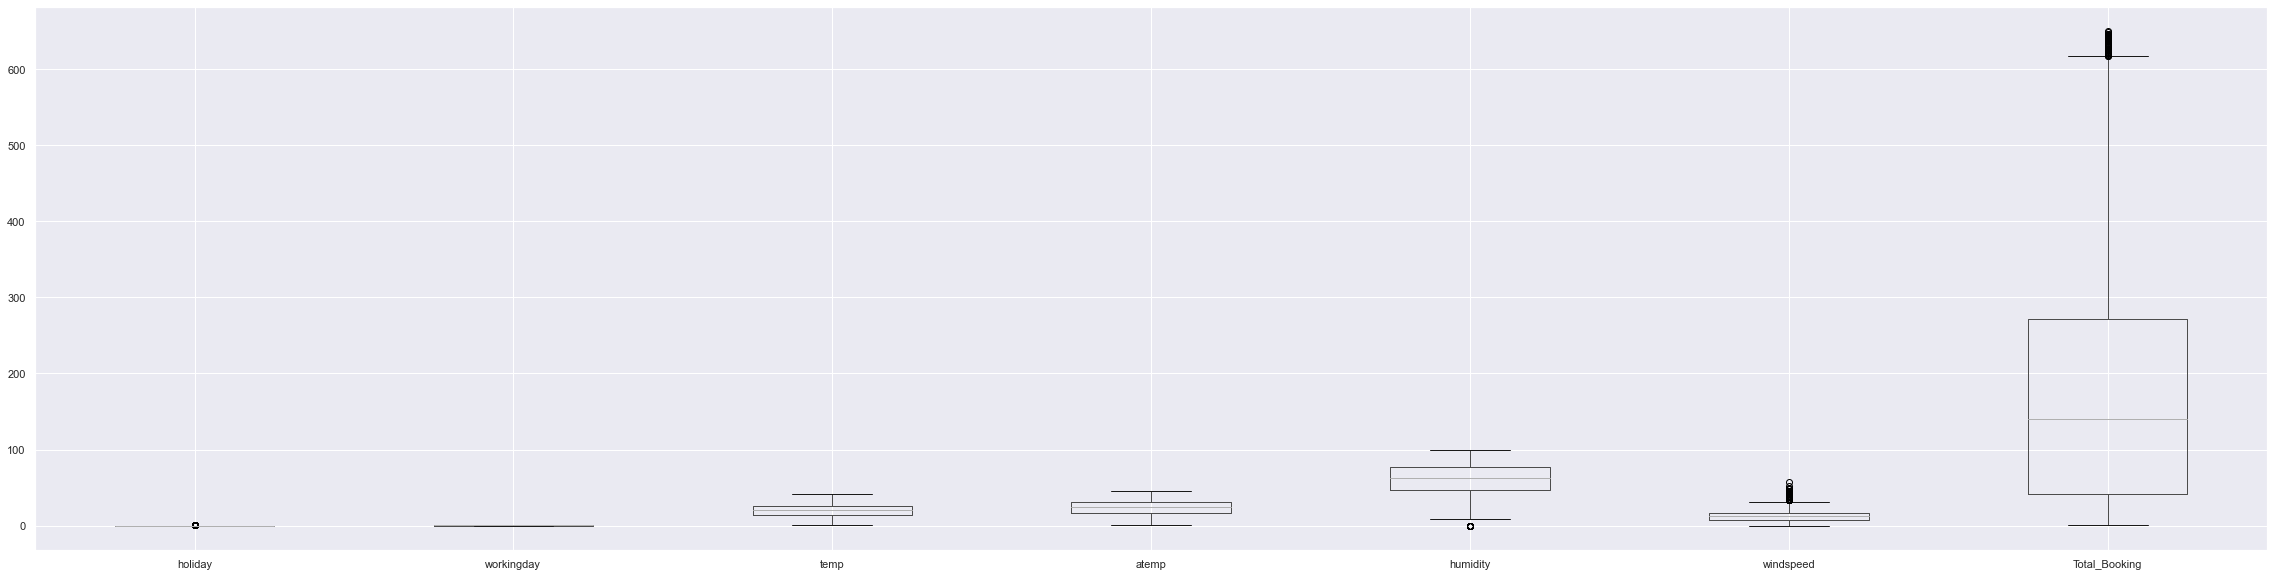

In [ ]:
train.boxplot()

In [ ]:
train.shape

(8466, 12)

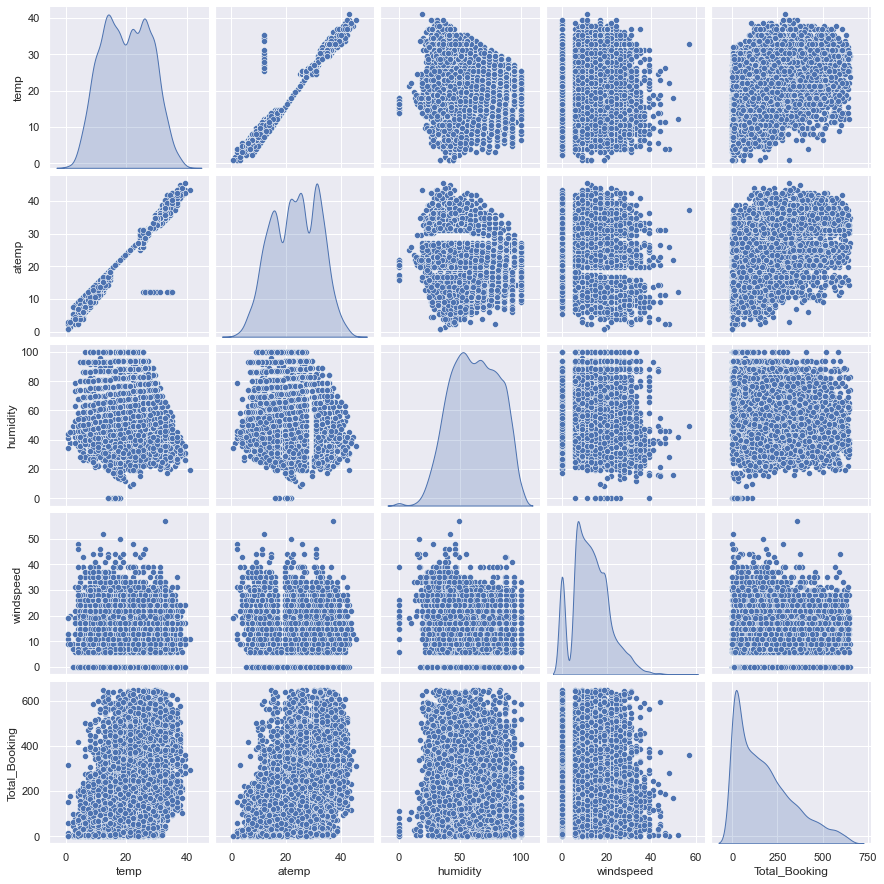

In [ ]:
sns.pairplot(train[["temp","atemp","humidity","windspeed","Total_Booking"]], diag_kind ='kde')

# 5. Correlation Analysis

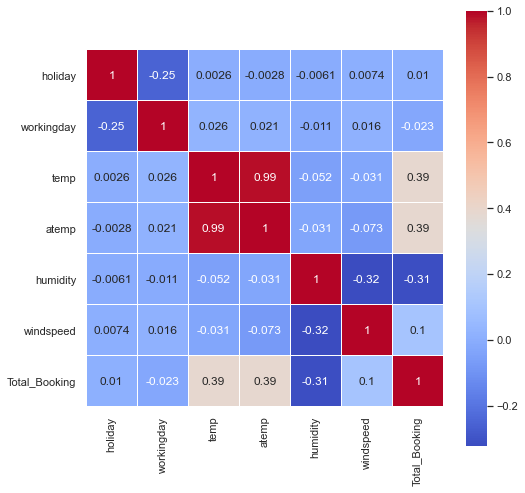

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', cmap='coolwarm',annot=True)
plt.show()

In [ ]:
 # remove to avoid multicollinearity- Temp & atemp are highly correlated
del(train["atemp"])

In [ ]:
train.shape

(8466, 11)

- Data Visualization

<AxesSubplot:xlabel='Total_Booking', ylabel='Density'>

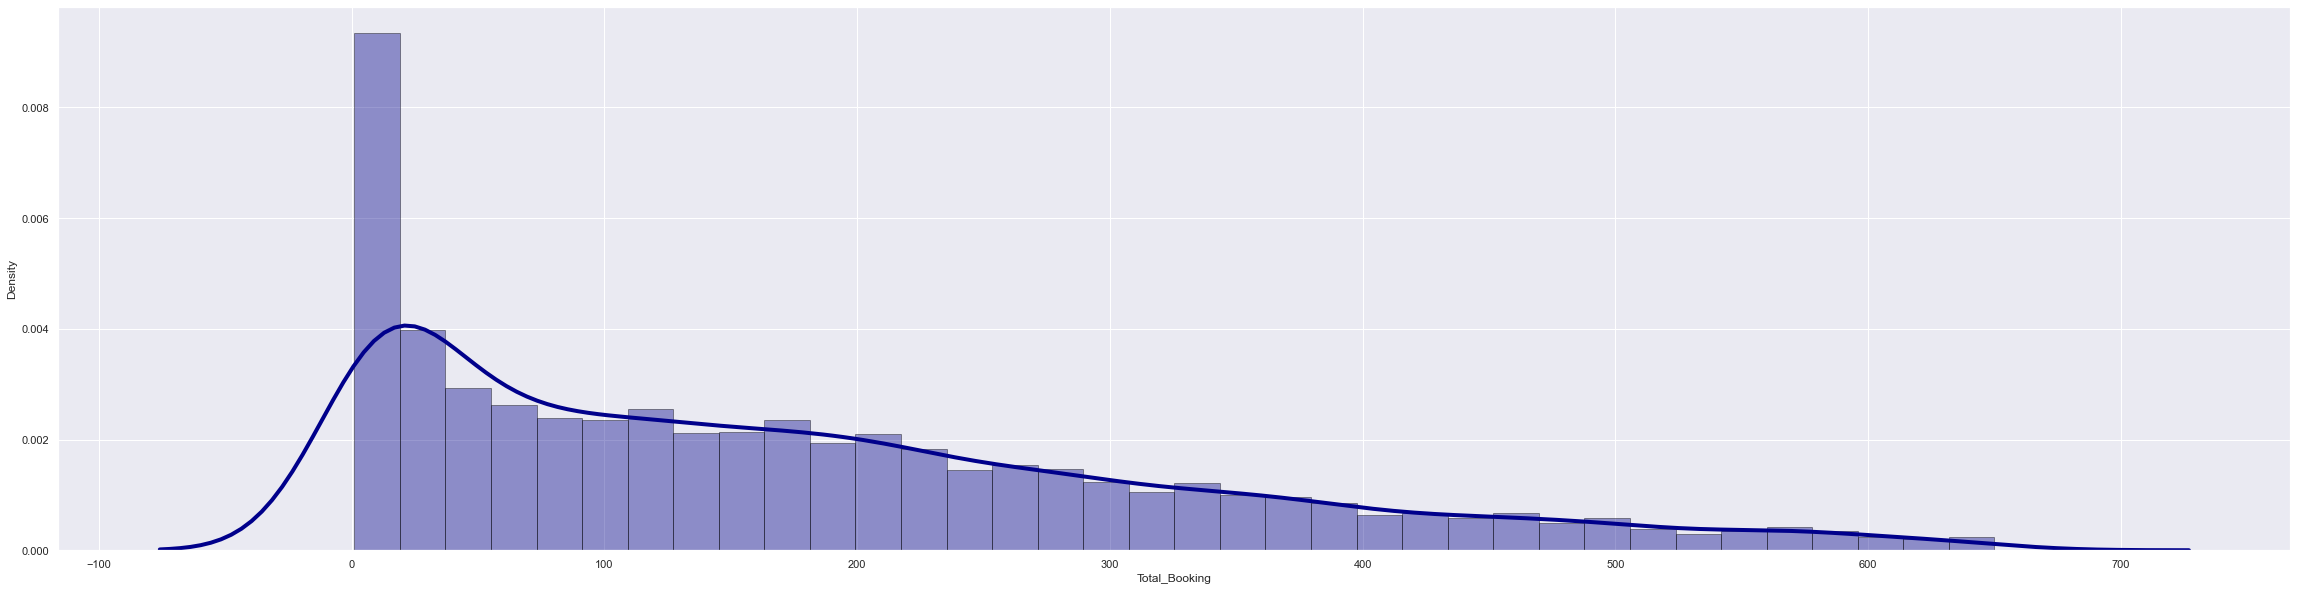

In [ ]:
sns.distplot(train['Total_Booking'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

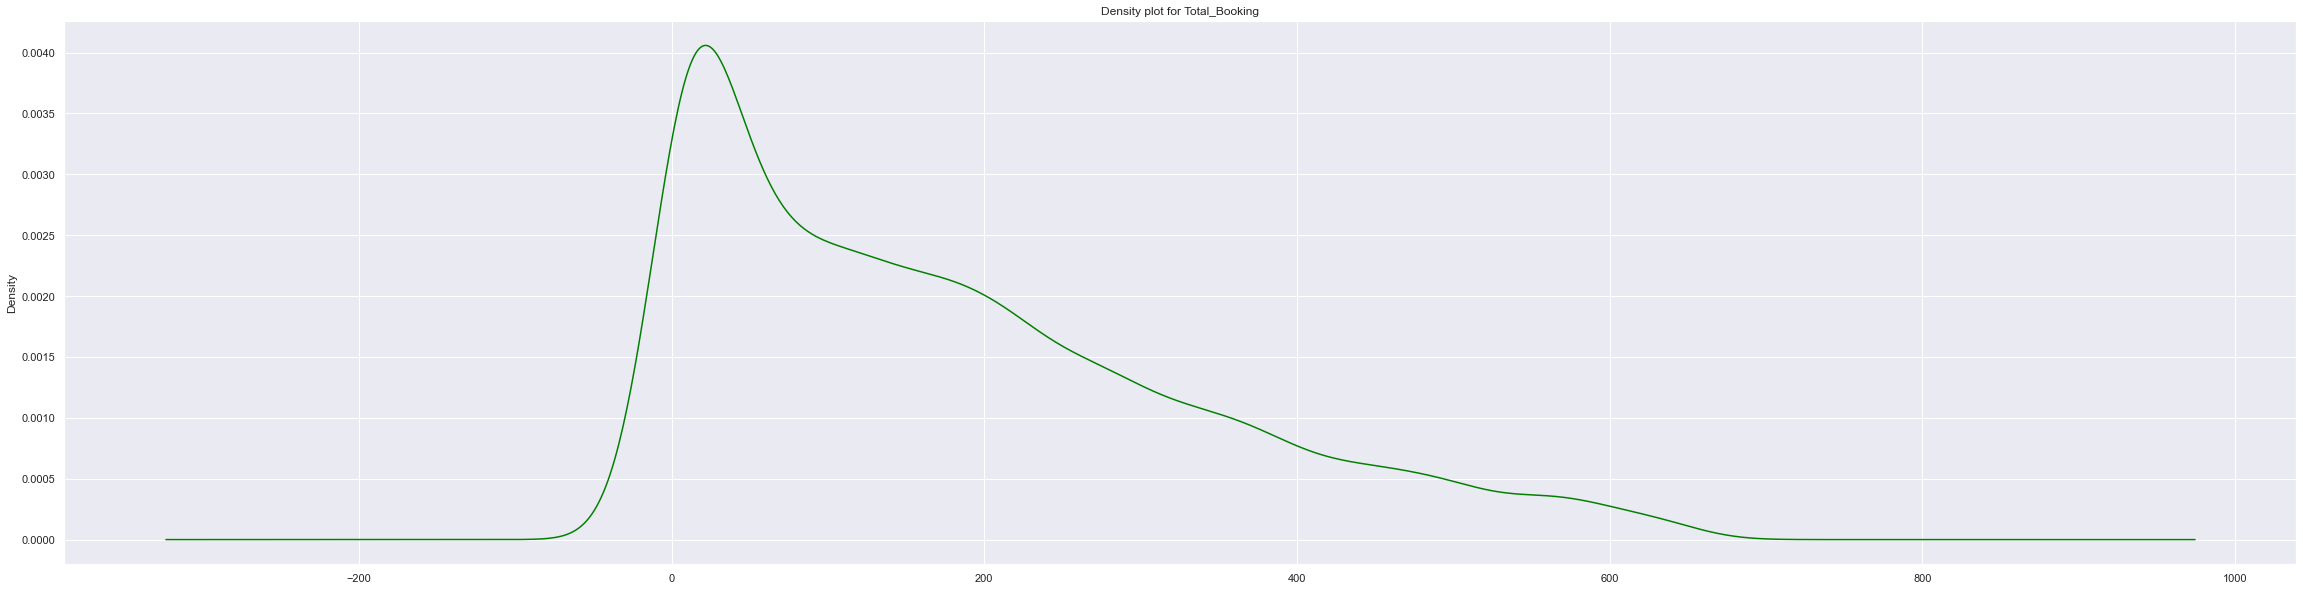

In [ ]:
train.Total_Booking.plot.density(color='green')
plt.title('Density plot for Total_Booking')
plt.show()

<AxesSubplot:xlabel='month', ylabel='Total_Booking'>

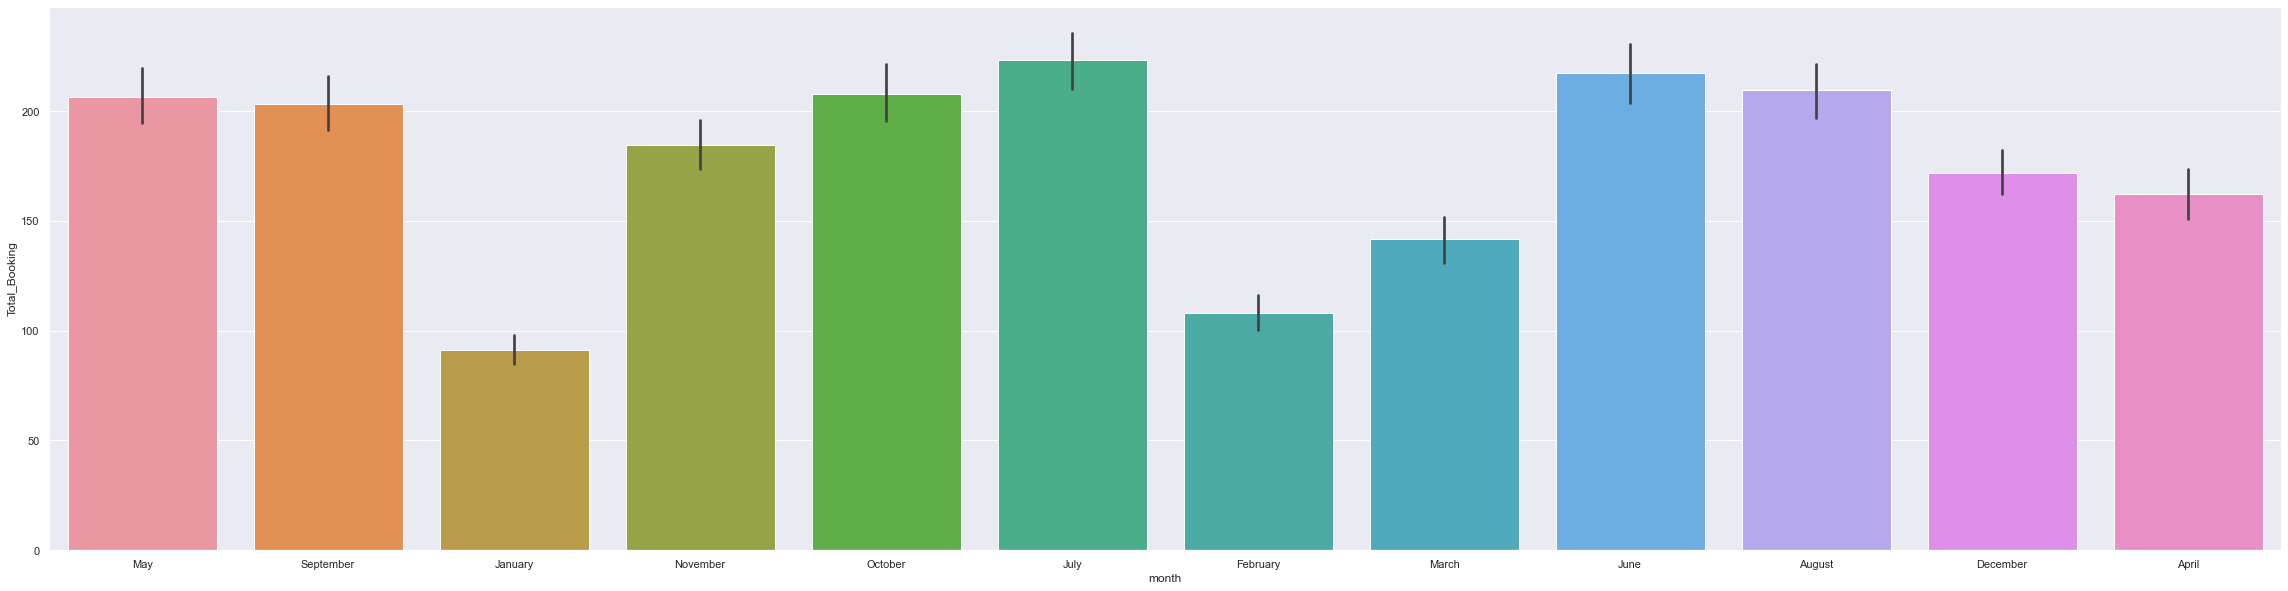

In [ ]:
sns.barplot(x = 'month', y = 'Total_Booking', data = train)

<AxesSubplot:xlabel='season', ylabel='Total_Booking'>

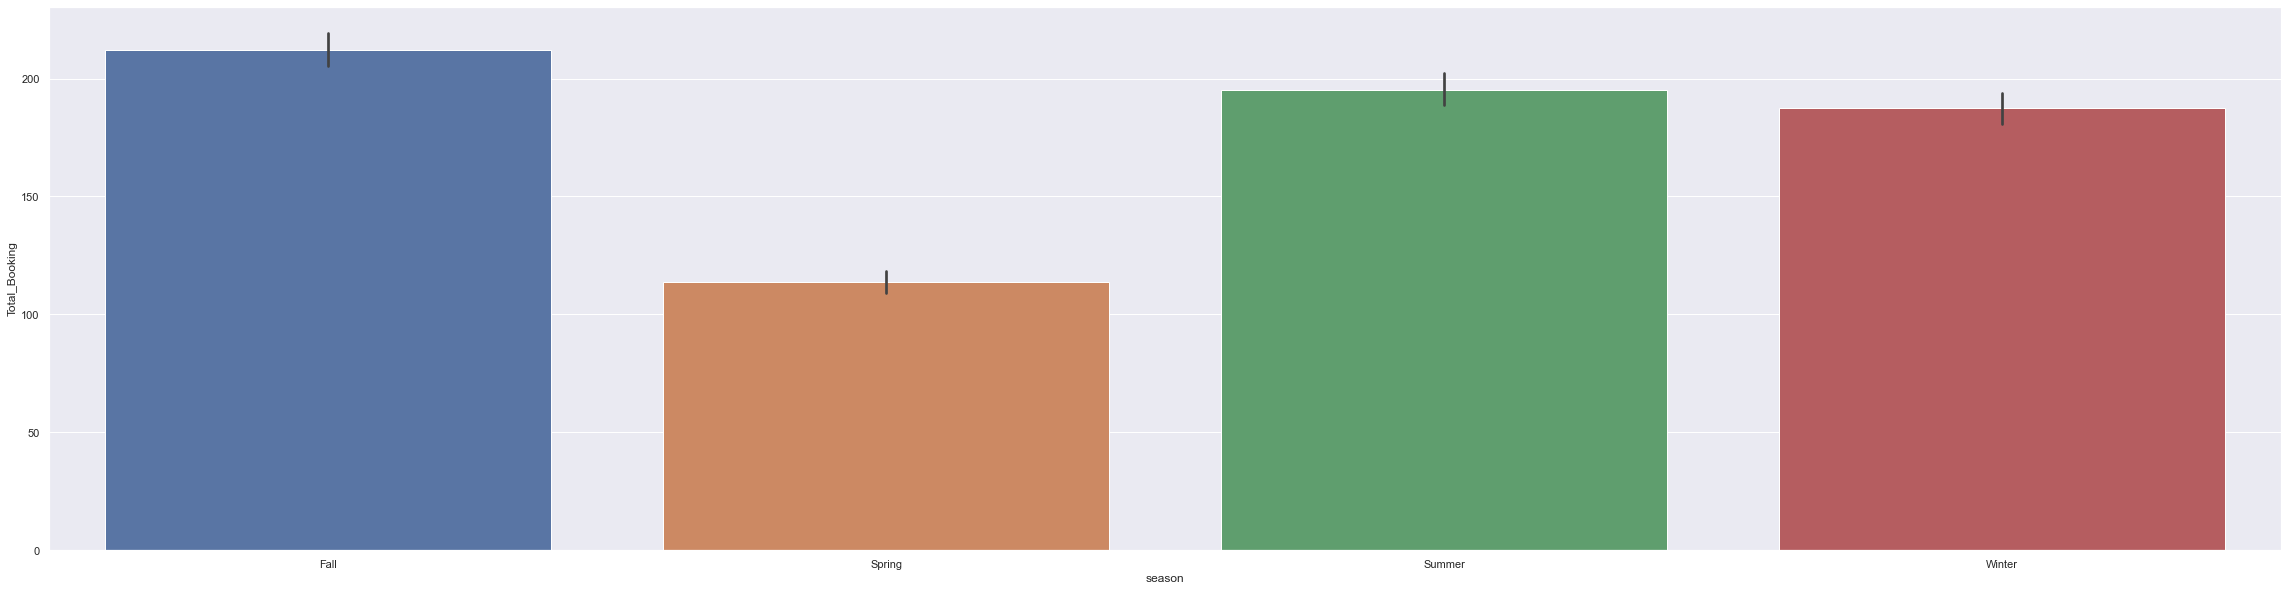

In [ ]:
sns.barplot(x = 'season', y = 'Total_Booking', data = train)

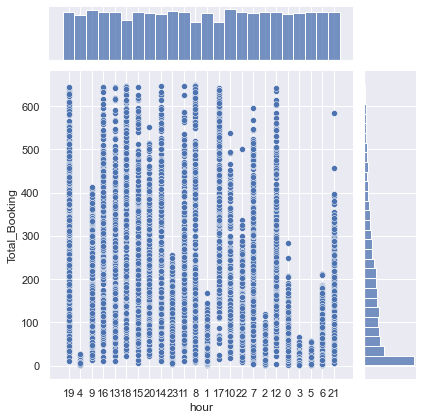

In [ ]:
sns.jointplot(train.hour, train.Total_Booking, kind='scatter')
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='Total_Booking'>

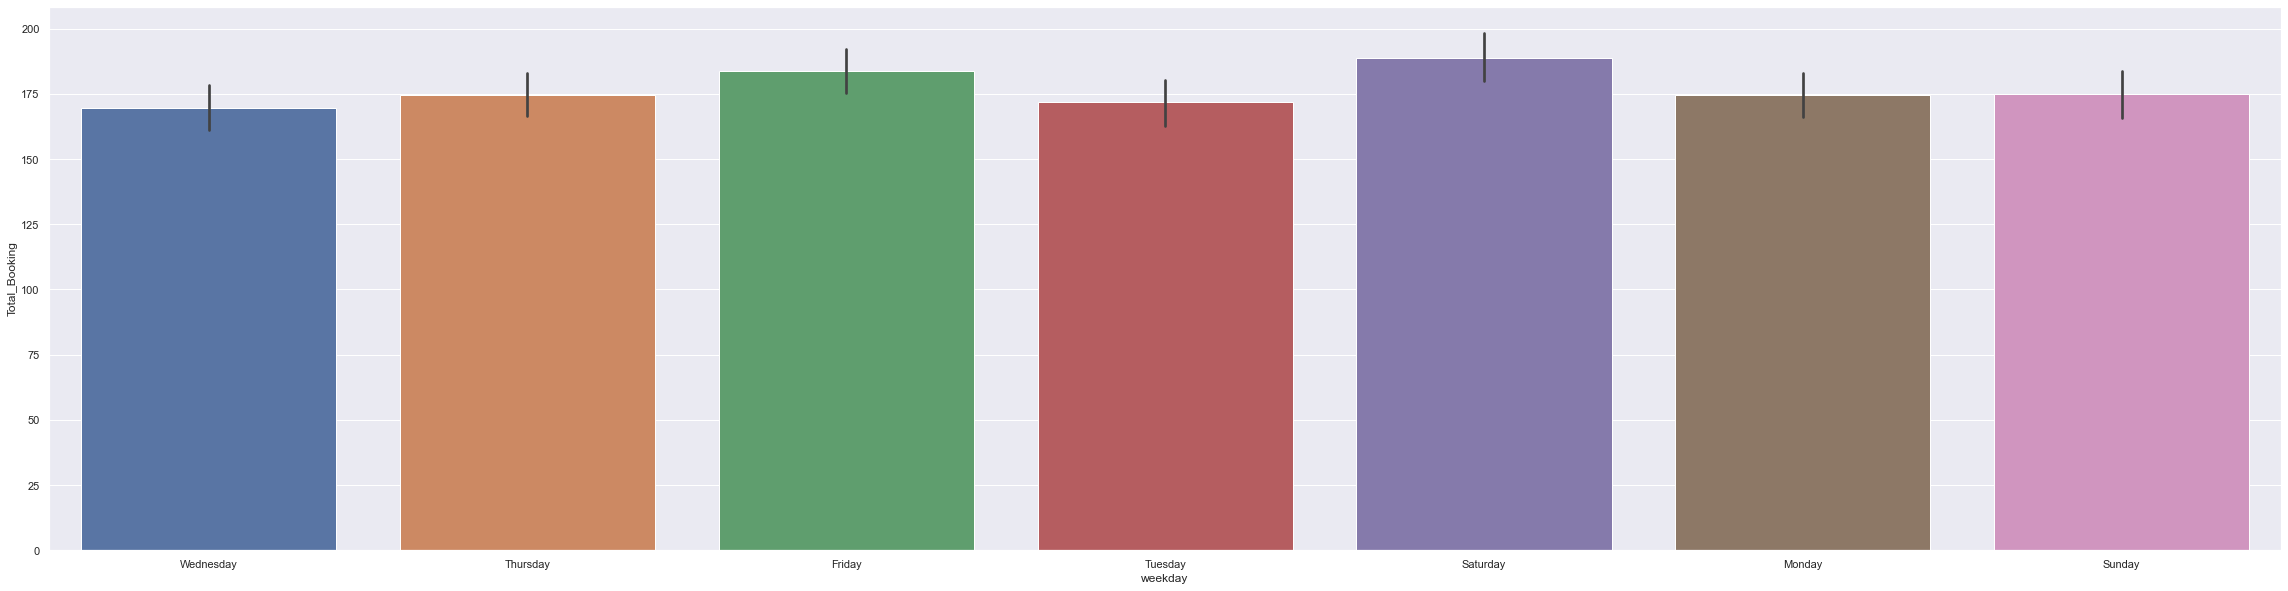

In [ ]:
sns.barplot(x = 'weekday', y = 'Total_Booking', data = train)

<AxesSubplot:>

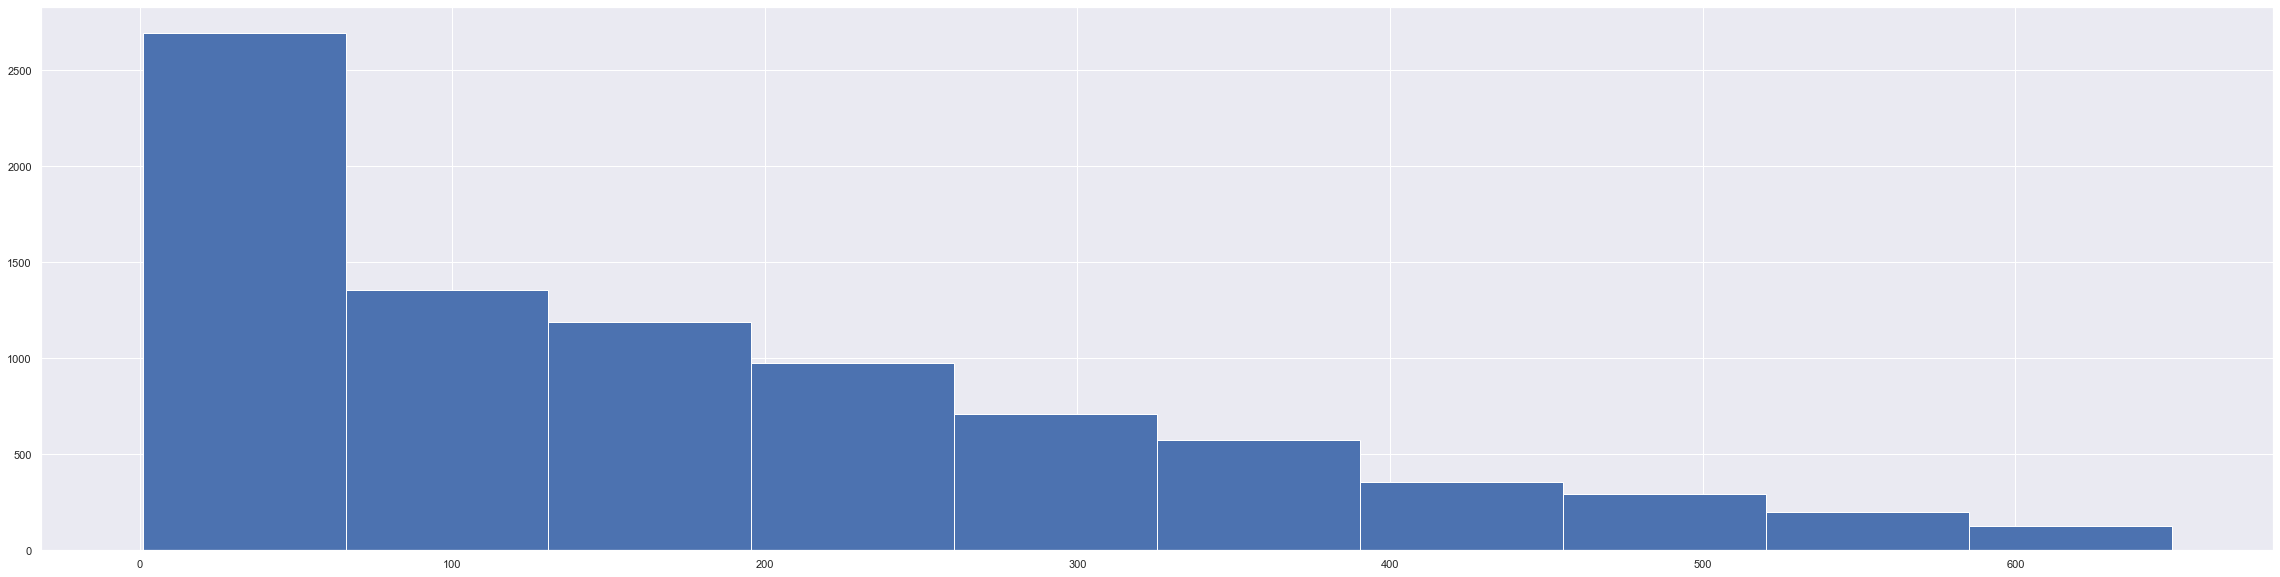

In [ ]:
train.Total_Booking.hist()

- Encoding

In [ ]:
train_data = pd.get_dummies(train)
train_data.head()

holiday  workingday   temp  humidity  windspeed  Total_Booking  season_Fall  season_Spring  season_Summer  season_Winter  weather_ Clear + Few clouds  weather_ Heavy Rain + Thunderstorm   weather_ Light Snow, Light Rain  weather_ Mist + Cloudy   hour_0  hour_1  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_2  hour_20  hour_21  hour_22  hour_23  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  weekday_Friday  weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  month_April  month_August  month_December  month_February  month_January  month_July  month_June  month_March  month_May  month_November  month_October  month_September
0        0           1  22.14        77    16.9979            504            0              0              1              0                            1                                    0                                0                        0       0       0        0        0        0        0        0        0        0        0        0        1       0        0        0        0        0       0       0       0       0       0       0       0               0               0                 0               0                 0                0                  1            0             0               0               0              0           0           0            0          1               0              0                0
1        0           1  28.70        79    19.0012              5            1              0              0              0                            1                                    0                                0                        0       0       0        0        0        0        0        0        0        0        0        0        0       0        0        0        0        0       0       1       0       0       0       0       0               0               0                 0               0                 0                0                  1            0             0               0               0              0           0           0            0          0               0              0                1
2        0           1   5.74        50    22.0028            139            0              1              0              0                            1                                    0                                0                        0       0       0        0        0        0        0        0        0        0        0        0        0       0        0        0        0        0       0       0       0       0       0       0       1               0               0                 0               0                 1                0                  0            0             0               0               0              1           0           0            0          0               0              0                0
3        0           1  13.94        29     8.9981            209            0              0              0              1                            1                                    0                                0                        0       0       0        0        0        0        0        0        0        1        0        0        0       0        0        0        0        0       0       0       0       0       0       0       0               1               0                 0               0                 0                0                  0            0             0               0               0              0           0           0            0          0               1              0                0
4        0           1  30.34        51    19.0012            184            1              0              0              0                            1                                    0                                0                        0       0       0        0        0  

In [ ]:
train_data.shape

(8466, 57)

- Split Dataset for training and testing

In [ ]:
X = train_data.drop('Total_Booking', axis =1)
y = train_data['Total_Booking']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6772, 56)
(1694, 56)


- Fit Various Model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#--------------- Decision Tree Model---------------
#1st call the model
DT_model = DecisionTreeRegressor()

#2nd fit the model
DT_model.fit(X_train,y_train)

# predict the model
y_pred_DT = DT_model.predict(X_test)
#print('prediction for Decision Tree:', y_pred_DT)
y_pred_train = DT_model.predict(X_train)
#print('prediction for train:', y_pred_train)


#-------------- RANDOM FOREST----------------------

#1st call the model
RF_model = RandomForestRegressor( random_state = 0)

#2nd fit the model
RF_model.fit(X_train,y_train)

# predict the model
y_pred_RF = RF_model.predict(X_test)
#print('prediction for Random Forest:', y_pred_RF)
y_pred_train = RF_model.predict(X_train)
#print('prediction for train:', y_pred_train)

# XG BOOST----
XG_model = XGBRFRegressor()
XG_model.fit(X_train, y_train)
y_pred_XG = XG_model.predict(X_test)
#print('prediction for XGBoost:', y_pred_XG)

# SVM -----
SVM_model = SVR()
SVM_model.fit(X_train, y_train)
y_pred_SVM = SVM_model.predict(X_test)
#print('prediction for SVM:', y_pred_SVM)
# KNN ----
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)
y_pred_KNN = KNN_model.predict(X_test)
#print('prediction for SVM:', y_pred_KNN)

# Gradient Boosting
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB = GB_model.predict(X_test)
#print('prediction for GB:', y_pred_GB)

# Ada Boosting
AB_model = AdaBoostRegressor()
AB_model.fit(X_train, y_train)
y_pred_AB = AB_model.predict(X_test)
#print('prediction for GB:', y_pred_GB)
print('Model fit')

Model fit


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("R squared value for DT :", r2_score(y_test, y_pred_DT))
print("R squared value for RF:", r2_score(y_test, y_pred_RF))
print("R squared value for XG:", r2_score(y_test, y_pred_XG))
print("R squared value for SVM:", r2_score(y_test, y_pred_SVM))
print("R squared value for KNN:", r2_score(y_test, y_pred_KNN))
print("R squared value for GB:", r2_score(y_test, y_pred_GB))
print("R squared value for AB:", r2_score(y_test, y_pred_AB))

print("MSE for DT :", mean_squared_error(y_test, y_pred_DT))
print("MSE for RF:", mean_squared_error(y_test, y_pred_RF))
print("MSE for XG:", mean_squared_error(y_test, y_pred_XG))
print("MSE for SVM:", mean_squared_error(y_test, y_pred_SVM))
print("MSE for KNN:", mean_squared_error(y_test, y_pred_KNN))
print("MSE for GB:", mean_squared_error(y_test, y_pred_GB))
print("MSE for AB:", mean_squared_error(y_test, y_pred_AB))

R squared value for DT : 0.6741332468232396
R squared value for RF: 0.8354197771760357
R squared value for XG: 0.5130508896569834
R squared value for SVM: 0.1679652652268958
R squared value for KNN: 0.23901017222862841
R squared value for GB: 0.7178058017450006
R squared value for AB: 0.3104201082017093
MSE for DT : 8182.213105076741
MSE for RF: 4132.45733999822
MSE for XG: 12226.842270076166
MSE for SVM: 20891.623476073764
MSE for KNN: 19107.751499409682
MSE for GB: 7085.635599917186
MSE for AB: 17314.713982524074


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
models = {
    "AdaBoostRegressor":{"model":AdaBoostRegressor() },
    "SVR":{"model":SVR() },
    "KNeighborsRegressor":{"model":KNeighborsRegressor() },
    "DecisionTreeRegressor":{"model":DecisionTreeRegressor() },
    "RandomForestRegressor":{"model":RandomForestRegressor() },
}

# Use the K-fold cross validation for each model
# to get the mean validation accuracy and the mean training time
k = 5
for name, m in models.items():
    # Cross validation of the model
    model = m['model']
    result = cross_validate(model, X_train,y_train, cv = k, scoring='neg_mean_squared_error')
    
    # Mean accuracy and mean training time
    result['test_score'] = result['test_score']
    mean_RMSE = [(-x)**0.5 for x in result['test_score']] # Root Mean Square Error
    mean_RMSE = sum(mean_RMSE)/len(mean_RMSE)
    mean_RMSE = int(mean_RMSE)
    mean_fit_time = round( sum(result['fit_time']) / len(result['fit_time']), 4)
    
    # Add the result to the dictionary witht he models
    m['mean_RMSE'] = mean_RMSE
    m['Training time (sec)'] = mean_fit_time
    
    # Display the result
    print(f"{name:27} mean RMSE for {k}-fold CV: {mean_RMSE} - mean training time {mean_fit_time} sec")

AdaBoostRegressor           mean RMSE for 5-fold CV: 130 - mean training time 0.2159 sec
SVR                         mean RMSE for 5-fold CV: 143 - mean training time 4.4267 sec
KNeighborsRegressor         mean RMSE for 5-fold CV: 136 - mean training time 0.1247 sec
DecisionTreeRegressor       mean RMSE for 5-fold CV: 97 - mean training time 0.0939 sec
RandomForestRegressor       mean RMSE for 5-fold CV: 68 - mean training time 5.4618 sec


In [ ]:
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    lst = [name, v['mean_RMSE'],v['Training time (sec)']]
    models_result.append(lst)

encoded_data_result = pd.DataFrame(models_result, 
                          columns = ['model','RMSE','Training time (sec)'])
encoded_data_result.sort_values(by='RMSE', ascending=True, inplace=True)
encoded_data_result .reset_index(inplace=True,drop=True)
encoded_data_result

model  RMSE  Training time (sec)
0  RandomForestRegressor    68               5.4618
1  DecisionTreeRegressor    97               0.0939
2      AdaBoostRegressor   130               0.2159
3    KNeighborsRegressor   136               0.1247
4                    SVR   143               4.4267

- Display a Factor plot to visualize the RMSE values

<Figure size 1080x360 with 0 Axes>

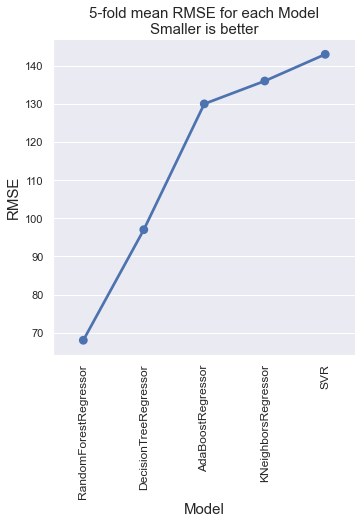

In [ ]:
plt.figure(figsize = (15,5))
sns.factorplot(x = 'model', y = 'RMSE', data = encoded_data_result)
plt.title(f'{k}-fold mean RMSE for each Model\nSmaller is better', fontsize = 15)
#plt.ylim(0.8,1.005)
plt.xlabel('Model', fontsize=15)
plt.ylabel('RMSE',fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()

- Perform Hyper-parameter tuning

In [ ]:
# RANDOM FOREST-

from sklearn.ensemble import RandomForestRegressor
# 1000 trees, samples creation with replacement(bootsrap = true), n_jobs = -1 full processing of system

RF_reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state=0)  

#fit the model
RF_reg = RF_reg.fit(X_train, y_train)

#Predict the model
y_train_pred_RF = RF_reg.predict(X_train)
y_pred_RFR = RF_reg.predict(X_test)

print("R squared:",r2_score(y_test,y_pred_RFR))

R squared: 0.8382149833105221


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid  
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,],
    'n_estimators': [300, 500, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  5.6min finished


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'n_estimators': [300, 500, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 40, 'n_estimators': 1000}

In [ ]:
cvrf_grid = grid_search.best_estimator_

#Predict the model
pred_clf = cvrf_grid.predict(X_train)
y_pred_clf = cvrf_grid.predict(X_test)
print("R squared value for GridSearch :", r2_score(y_test, y_pred_clf))
print("MSE for GridSearch :", mean_squared_error(y_test, y_pred_clf))

R squared value for GridSearch : 0.8382104939453212
MSE for GridSearch : 4062.385020255246


<AxesSubplot:>

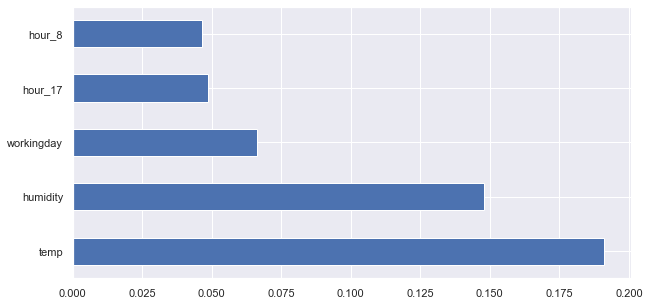

In [ ]:
# FEATURE IMPORTANCE
feat_importances = pd.Series(cvrf_grid.feature_importances_, index=X_train.columns)
f, ax = plt.subplots(figsize=(10,5))
feat_importances.nlargest(5).plot(kind='barh')

- Perform prediction on the test set

In [ ]:
test.head()

datetime  season  holiday  workingday                  weather   temp   atemp  humidity  windspeed  Total_Booking        date hour   weekday    month
0   5/10/2012 11:00  Summer        0           1       Clear + Few clouds  21.32  25.000        48    35.0008            256   5/10/2012   11  Thursday      May
1     6/9/2012 7:00  Summer        0           0       Clear + Few clouds  23.78  27.275        64     7.0015             87    6/9/2012    7  Saturday     June
2    3/6/2011 20:00  Spring        0           0   Light Snow, Light Rain  11.48  12.120       100    27.9993             11    3/6/2011   20    Sunday    March
3  10/13/2011 11:00  Winter        0           1           Mist + Cloudy   25.42  28.790        83     0.0000             84  10/13/2011   11  Thursday  October
4    6/2/2012 12:00  Summer        0           0       Clear + Few clouds  25.42  31.060        43    23.9994            668    6/2/2012   12  Saturday     June

In [ ]:
del(test["datetime"])
del(test["date"])
del(test["atemp"])

In [ ]:
test.head()

season  holiday  workingday                  weather   temp  humidity  windspeed  Total_Booking hour   weekday    month
0  Summer        0           1       Clear + Few clouds  21.32        48    35.0008            256   11  Thursday      May
1  Summer        0           0       Clear + Few clouds  23.78        64     7.0015             87    7  Saturday     June
2  Spring        0           0   Light Snow, Light Rain  11.48       100    27.9993             11   20    Sunday    March
3  Winter        0           1           Mist + Cloudy   25.42        83     0.0000             84   11  Thursday  October
4  Summer        0           0       Clear + Few clouds  25.42        43    23.9994            668   12  Saturday     June

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         2178 non-null   object 
 1   holiday        2178 non-null   int64  
 2   workingday     2178 non-null   int64  
 3   weather        2178 non-null   object 
 4   temp           2178 non-null   float64
 5   humidity       2178 non-null   int64  
 6   windspeed      2178 non-null   float64
 7   Total_Booking  2178 non-null   int64  
 8   hour           2178 non-null   object 
 9   weekday        2178 non-null   object 
 10  month          2178 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 187.3+ KB


In [ ]:
test.shape

(2178, 11)

In [ ]:
test_data = pd.get_dummies(test)
test_data.head()

holiday  workingday   temp  humidity  windspeed  Total_Booking  season_Fall  season_Spring  season_Summer  season_Winter  weather_ Clear + Few clouds  weather_ Light Snow, Light Rain  weather_ Mist + Cloudy   hour_0  hour_1  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_2  hour_20  hour_21  hour_22  hour_23  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  weekday_Friday  weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  month_April  month_August  month_December  month_February  month_January  month_July  month_June  month_March  month_May  month_November  month_October  month_September
0        0           1  21.32        48    35.0008            256            0              0              1              0                            1                                0                        0       0       0        0        1        0        0        0        0        0        0        0        0       0        0        0        0        0       0       0       0       0       0       0       0               0               0                 0               0                 1                0                  0            0             0               0               0              0           0           0            0          1               0              0                0
1        0           0  23.78        64     7.0015             87            0              0              1              0                            1                                0                        0       0       0        0        0        0        0        0        0        0        0        0        0       0        0        0        0        0       0       0       0       0       1       0       0               0               0                 1               0                 0                0                  0            0             0               0               0              0           0           1            0          0               0              0                0
2        0           0  11.48       100    27.9993             11            0              1              0              0                            0                                1                        0       0       0        0        0        0        0        0        0        0        0        0        0       0        1        0        0        0       0       0       0       0       0       0       0               0               0                 0               1                 0                0                  0            0             0               0               0              0           0           0            1          0               0              0                0
3        0           1  25.42        83     0.0000             84            0              0              0              1                            0                                0                        1       0       0        0        1        0        0        0        0        0        0        0        0       0        0        0        0        0       0       0       0       0       0       0       0               0               0                 0               0                 1                0                  0            0             0               0               0              0           0           0            0          0               0              1                0
4        0           0  25.42        43    23.9994            668            0              0              1              0                            1                                0                        0       0       0        0        0        1        0        0        0        0        0        0        0       0        0        0        0        0       0       0       0       0       0       0       0               0               0                 1  

In [ ]:
test_data.shape

(2178, 56)

In [ ]:
# Fitting Grid Search Model to test dataset

New_pred = cvrf_grid.predict(test_data)
print("R squared for prediction v/s test_label:",r2_score(test_label, New_pred))
print("MSE for prediction v/s test_label :", mean_squared_error(test_label, New_pred))

R squared for prediction v/s test_label: 0.7975568243532246
MSE for prediction v/s test_label : 6514.835068974268


In [ ]:
New_pred = pd.DataFrame(New_pred)
New_pred.columns = ['Predictions']
New_pred

Predictions
0      214.133375
1      157.009471
2       76.376000
3      163.563100
4      443.973000
...           ...
2173    11.658000
2174   138.650000
2175   134.978750
2176    24.238000
2177   381.800000

[2178 rows x 1 columns]

In [ ]:
Dataset_test = test.join(New_pred)
Dataset_test

season  holiday  workingday                  weather   temp  humidity  windspeed  Total_Booking hour    weekday    month  Predictions
0     Summer        0           1       Clear + Few clouds  21.32        48    35.0008            256   11   Thursday      May   214.133375
1     Summer        0           0       Clear + Few clouds  23.78        64     7.0015             87    7   Saturday     June   157.009471
2     Spring        0           0   Light Snow, Light Rain  11.48       100    27.9993             11   20     Sunday    March    76.376000
3     Winter        0           1           Mist + Cloudy   25.42        83     0.0000             84   11   Thursday  October   163.563100
4     Summer        0           0       Clear + Few clouds  25.42        43    23.9994            668   12   Saturday     June   443.973000
...      ...      ...         ...                      ...    ...       ...        ...            ...  ...        ...      ...          ...
2173  Spring        0           1       Clear + Few clouds  18.86        63    26.0027              3    3   Thursday    March    11.658000
2174  Spring        0           1           Mist + Cloudy   13.94        81     7.0015            144   12   Thursday  January   138.650000
2175  Spring        0           1       Clear + Few clouds  18.86        59    19.9995            159   22  Wednesday    March   134.978750
2176  Summer        0           1       Clear + Few clouds  17.22        94     8.9981             29    5   Thursday      May    24.238000
2177    Fall        0           1       Clear + Few clouds  30.34        66    16.9979            224   16  Wednesday     July   381.800000

[2178 rows x 12 columns]